# 14. Programming Question

Consider the weather data that we used before. This time we will focus on Philadelphia and New York
weather data. Similar to what we did before, we will again convert Kelvin to Fahrenheit. Assuming
we are in March 2017, we will try to understand if the temperatures of this month are within known
limits.

Weather Data Set: https://www.kaggle.com/selfishgene/historical-hourly-weather-data/data

In [29]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# read the data
temp = pd.read_csv('temperature.csv')

# Convert Kelvin to Fahrenheit to Improve our Understanding
temp.iloc[:,1:] = (temp.iloc[:,1:] - 273.15) * 1.8 + 32

temp.head(5)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,96.710000,NaN,NaN,NaN
1,2012-10-01 13:00:00,52.664000,48.074000,61.394000,47.570000,65.696000,65.084000,68.468000,74.210000,53.546000,...,54.464000,59.126000,54.824000,57.236000,93.992000,90.176000,99.374000,88.25,88.25,86.63
2,2012-10-01 14:00:00,52.662274,48.079854,61.384987,47.564990,65.692734,65.090302,68.455654,74.225315,53.608205,...,54.523774,59.175817,54.832370,57.264966,93.992000,88.088000,99.222385,88.25,88.25,86.63
3,2012-10-01 15:00:00,52.658596,48.095360,61.359113,47.551699,65.683120,65.108039,68.435919,74.266677,53.751113,...,54.692283,59.318491,54.856021,57.347009,93.634723,88.037314,99.070769,88.25,88.25,86.63
4,2012-10-01 16:00:00,52.654918,48.110866,61.333238,47.538407,65.673506,65.125777,68.416183,74.308039,53.894021,...,54.860793,59.461166,54.879672,57.429052,93.191359,87.958426,98.919154,88.25,88.25,86.63


(a) Filter March temperature records from all years, using all the data from all March records,
calculate the mean and standard deviation. Do this separately for Philadelphia and New York.
Later we will use these parameters as population parameters.

In [30]:
# filter data for Philadelphia and New York separately

temp_phl_mar = temp[temp['datetime'].str.contains('-03-')][['datetime', 'Philadelphia']]
temp_ny_mar = temp[temp['datetime'].str.contains('-03-')][['datetime', 'New York']]

# find the mean and standard deviation for all March records
mean_phl_mar = np.mean(temp_phl_mar)
stdev_phl_mar = np.std(temp_phl_mar)

print('PHL All March ->', 'Mean:', mean_phl_mar[0], ', Std:', stdev_phl_mar[0])

mean_ny_mar = np.mean(temp_ny_mar)
stdev_ny_mar = np.std(temp_ny_mar)

print('NY All March ->', 'Mean:', mean_ny_mar[0], ', Std:', stdev_ny_mar[0])

PHL All March -> Mean: 39.41389525661157 , Std: 11.513138047695563
NY All March -> Mean: 38.50143366971251 , Std: 10.611241372088655


(b) Filter the data for March 2017. Using this data calculate the sample means for Philadelphia and
New York. We will use these sample means as our observations. Using these observations provide
99% confidence intervals for the true mean. Do this separately for Philadelphia and New York.
We already know the true means from part a. Do the true means lie within the intervals?

In [31]:
# calculate the sample means for March 2017 on each place

temp_phl_mar17 = temp[temp['datetime'].str.contains('2017-03')][['datetime', 'Philadelphia']]
temp_ny_mar17 = temp[temp['datetime'].str.contains('2017-03')][['datetime', 'New York']]

mean_phl_mar17 = np.mean(temp_phl_mar17)
mean_ny_mar17 = np.mean(temp_ny_mar17)

print('PHL March 2017 ->', 'Mean:', mean_phl_mar17[0])
print('NY March 2017 ->', 'Mean:', mean_ny_mar17[0])

PHL March 2017 -> Mean: 39.49993730170569
NY March 2017 -> Mean: 37.88183870967743


In [32]:
# calculate the confidence interval separately for each place

z_s = norm.ppf(0.995) # for 99% confidence interval, leave 1% probability on the tails

upper_bound_z_phl = mean_phl_mar17 + z_s * stdev_phl_mar / np.sqrt(len(temp_phl_mar17))
lower_bound_z_phl = mean_phl_mar17 - z_s * stdev_phl_mar / np.sqrt(len(temp_phl_mar17))
print('PHL 99% CI ->', 'Lower Bound:', lower_bound_z_phl[0], ', Upper Bound:', upper_bound_z_phl[0])

upper_bound_z_ny = mean_ny_mar17 + z_s * stdev_ny_mar / np.sqrt(len(temp_ny_mar17))
lower_bound_z_ny = mean_ny_mar17 - z_s * stdev_ny_mar / np.sqrt(len(temp_ny_mar17))
print('NY 99% CI ->', 'Lower Bound:', lower_bound_z_ny[0], ', Upper Bound:', upper_bound_z_ny[0])

PHL 99% CI -> Lower Bound: 38.41270005051068 , Upper Bound: 40.587174552900706
NY 99% CI -> Lower Bound: 36.879771605699155 , Upper Bound: 38.88390581365571


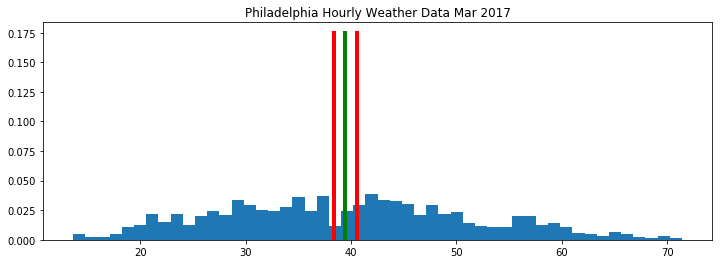

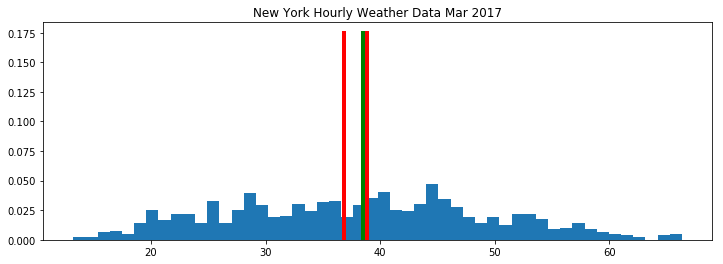

'\nThe plots below show clearly that the true mean (green vertical line) lies within \nthe 99% confidence intervals (red vertical lines)\n'

In [33]:
# plot the confidence interval and the true mean for each

plt.figure(figsize=(12,4))
plt.hist(temp_phl_mar17['Philadelphia'], bins = 50, density=True)
plt.title('Philadelphia Hourly Weather Data Mar 2017')
plt.plot([mean_phl_mar,mean_phl_mar],[0, 0.175], 'k-', lw=4, color='green')
plt.plot([upper_bound_z_phl,upper_bound_z_phl],[0, 0.175], 'k-', lw=4, color='red')
plt.plot([lower_bound_z_phl,lower_bound_z_phl],[0, 0.175], 'k-', lw=4, color='red')
plt.show()

plt.figure(figsize=(12,4))
plt.hist(temp_ny_mar17['New York'], bins = 50, density=True)
plt.title('New York Hourly Weather Data Mar 2017')
plt.plot([mean_ny_mar,mean_ny_mar],[0, 0.175], 'k-', lw=4, color='green')
plt.plot([upper_bound_z_ny,upper_bound_z_ny],[0, 0.175], 'k-', lw=4, color='red')
plt.plot([lower_bound_z_ny,lower_bound_z_ny],[0, 0.175], 'k-', lw=4, color='red')
plt.show()

"""
The plots below show clearly that the true mean (green vertical line) lies within 
the 99% confidence intervals (red vertical lines)
"""

(c) Based on our prior knowledge we assert that March average temperatures for Philadelphia and
New York are the same. Based on March 2017 temperature recordings we would like to test our
prior knowledge. Conduct this test using hypothesis testing, please state your hypotheses as well.
For population standard deviations use the standard deviations that you found in part a

Hypothesis Testing

$Null Hypothesis$, $H_0$ : March average temperatures for Philadelphia and New York are the same

$Alternative Hypothesis$, $H_1$ : March average temperatures for Philadelphia and New York are not the same

In other words,

$H_0$: $T_{Philadelphia}$ - $T_{New York}$ = 0

$H_1$: $T_{Philadelphia}$ - $T_{New York}$ $\neq$ 0

In [34]:
# calculate the z statistics with mean for March 2017 and standard deviation from March (population)

z = ((mean_phl_mar17[0] - mean_ny_mar17[0]) - (0 - 0)) / np.sqrt(stdev_phl_mar[0]**2/len(temp_phl_mar17) + 
                                                                 stdev_ny_mar[0]**2/len(temp_ny_mar17))
print(f'z statistic: {z}')
print('p-value:', 1-norm.cdf(z))

"""
p-value is very small, we can reject the null hypothesis with a 99% confidence interval
"""

z statistic: 2.8188683808462716
p-value: 0.0024096637596531245


'\np-value is very small, we can reject the null hypothesis with a 99% confidence interval\n'

(d) Repeat part c but this time assume that your sample sizes are 10. This means we have the same
average March 2017 temperatures as part c. We will again use the population standard deviation
from part a. However, we will use a different sample size this time.

In [35]:
# calculate the z statistics with mean for March 2017 and standard deviation from March, but now for sample size of 10

no_samples = 10
z = ((mean_phl_mar17[0] - mean_ny_mar17[0]) - (0 - 0)) / np.sqrt(stdev_phl_mar[0]**2/no_samples + 
                                                                 stdev_ny_mar[0]**2/no_samples)
print(f'z statistic: {z}')
print('p-value:', 1-norm.cdf(z))

"""
p-value is not small enough to reject the null hypothesis under a 99% confidence interval
"""

z statistic: 0.32680472755672585
p-value: 0.3719077917654091


'\np-value is not small enough to reject the null hypothesis under a 99% confidence interval\n'